[2.3283064376228985e-10, 0.3778026610975166, 0.6094795931640452, 0.3396482029183061, 0.2597081860339773, 0.026730817522262605, 0.003849093105573716, 0.20874298722890344, 0.46521824736391115, 0.04598244537877964, 0.3505952972223029, 0.6312264968320851, 0.16411711306502907, 0.4955186927670234, 0.9912751431070618, 0.325759287376776, 0.4423535642877005, 0.3832473889380914, 0.6374534201517018, 0.7432586915061151, 0.030282163773794734, 0.2581459818212995, 0.24698834249143878, 0.9738821249799254, 0.1920710740108374, 0.26487369684729434, 0.5250419918564344, 0.41390865012719696, 0.3442276505959349, 0.3681122571547107, 0.9442861068268708, 0.17550762401684541, 0.922990780055053, 0.6346586361223173, 0.23395868424976182, 0.07685998854081146, 0.016526877189300432, 0.4776803799800949, 0.44536874068219623, 0.5798837612755056, 0.565213630937605, 0.5014998004778753, 0.8549097964330157, 0.5904479544099643, 0.326029342983863, 0.19290735185747376, 0.5737665016547621, 0.795054305016554, 0.0740757810762505, 

(array([1.11983854, 1.06484647, 1.01985296, 0.87487386, 0.92486665]),
 array([2.32830644e-10, 1.99829008e-01, 3.99658015e-01, 5.99487022e-01,
        7.99316030e-01, 9.99145037e-01]),
 <BarContainer object of 5 artists>)

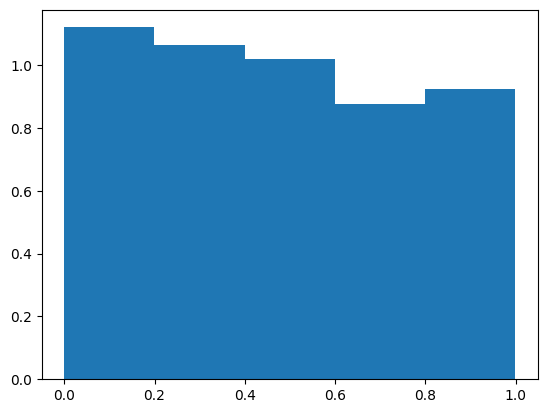

In [1]:
#GENERATOR LCG

import matplotlib.pyplot as plt
import numpy as np
def lcg(a, c, m, n, k, x_0):
    x = [x_0]
    for i in range(k*n):
        x.append((x[-1] * a + c) % m)
    y = [i/m for i in x]
    ans = []
    for j in range(0,len(y),k):
        ans.append(y[j])
    return ans

# n to liczba którą chcemy wygenrować
# k to o ile pomijamy, że bierzemy np co trzecią liczbe 

data = lcg(16807, 0, 2**(31) - 1, 1000, 3, 0.5)
print(data)
print(np.mean(data))
plt.hist(data, density=True, bins=5)

#w zadaniu chcieliśmy sprawidzić czy liczby wygenerowane są z rozkładu jednostajnego no to sprawdzam czy są równomiernie rozpieczone na [0,1] na przykład
#licze sobie wartość oczekiwaną 

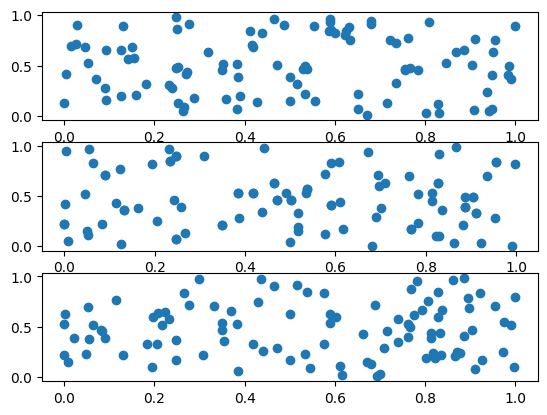

In [2]:
#GENERATOR LCG
a = 16807
m = 2**31 - 1
c = 0
import matplotlib.pyplot as plt
import numpy as np

v = []
N0 = 200
def LCG(k = 3, x0 = 1, v = [], N = N0, a = 16807, m = 2**31-1, c=0):
    while len(v) < k*N:
        x = (a*x0+c) % m
        v.append(x/m)
        x0 = x
    #plt.hist(v, density = True)
    return(v[::k])
fig, axes = plt.subplots(3)
axes[0].scatter(LCG(1)[0::2], LCG(1)[1::2])
axes[1].scatter(LCG(5)[0::2], LCG(5)[1::2])
axes[2].scatter(LCG(15)[0::2], LCG(15)[1::2])
plt.show()

#np.linspace(start, stop, ilość równomiernie rozłożonych punktów)
#scatter(x,y,s=rozmiar punktów, c=color, alpha=przezroczystość) i x oraz y tablice o tych samych wymiarach

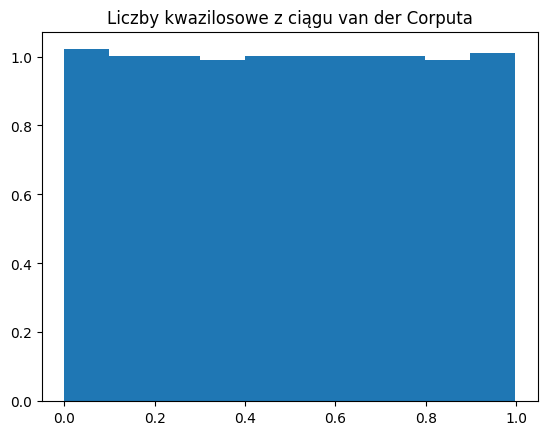

In [3]:
#Ciągi kwazilosowe, generator liczb kwazilosowaych

#Funkcja conversion(x, b) zamienia liczbę całkowitą x na jej reprezentację w systemie o podstawie b
def conversion(x, b):
    if x == 0:
        return "0"
    else:
        result = ""
        while x > 0:
            rem = x % b
            x //= b
            result += str(rem)
        return result[::-1]

#Funkcja reversing(x) odwraca ciąg znaków x i dodaje prefiks "0.".
def reversing(x):
    x_rev = x[::-1]
    return "0." + x_rev

#Funkcja reconversion(x, b) przekształca odwrócony ciąg x z powrotem na liczbę w systemie o podstawie b.
def reconversion(x, b):
    result = 0
    for i in range(2, len(x)):
        result += int(x[i]) * b**(-(int(i)-1))
    return result

def van_der_corput_sequence(n, b):
    result = []
    for i in range(n+1):
        result.append(reconversion(reversing(conversion(i, b)), b))
    return result

import matplotlib.pyplot as plt

plt.hist(van_der_corput_sequence(1000, 2),density=True)
plt.title("Liczby kwazilosowe z ciągu van der Corputa")
plt.show()




In [4]:
import numpy as np


n1 = 1000
x1 = np.linspace(0,1,n1)
y1 = np.linspace(0,1,n1)

count1 = 0
for i in range(len(x1)):
    for j in range(len(y1)):
        if np.sqrt(x1[i]**2+y1[j]**2) <= 1:
            count1 += 1

pi2 = 4*count1/(n1**2)
print(pi2)

3.139156
